### Crash Start with Probability 

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import math, random

In [2]:

# Uniform PDF 
def uniform_pdf(x): 
    return 1 if x >= 0 and x < 1 else 0

# Unfiorm CDF
def uniform_cdf(x):
    "returns the probability that a uniform random variable is less than x"
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X < 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1

# Normal PDF
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

# Normal CDF

def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

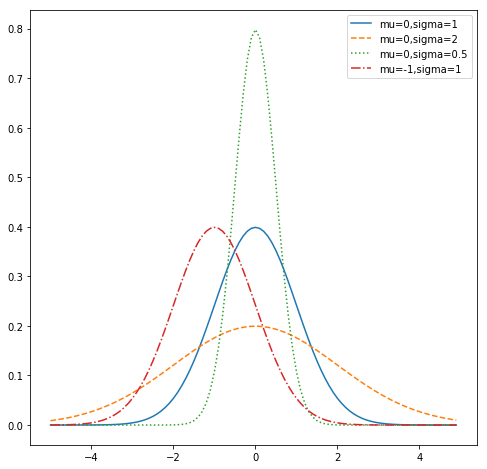

In [3]:
def plot_normal_pdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.figure(figsize=(8,8))
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=1)
    plt.show()

plot_normal_pdfs(plt)

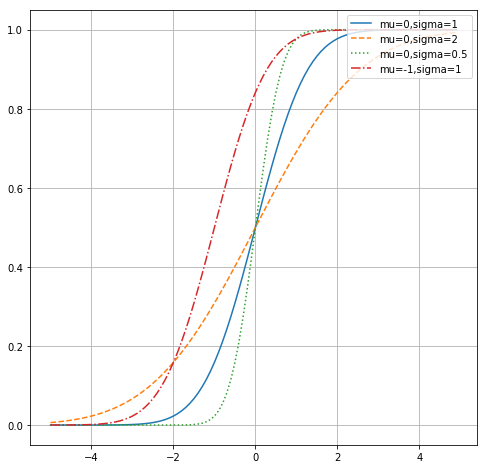

In [4]:
def plot_normal_cdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.figure(figsize=(8,8))
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=1) # bottom right
    plt.grid()
    plt.gray()
    plt.show()
    
plot_normal_cdfs(plt)

In [5]:
# Find the Inverse of Normal Distribution 

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

p=0.51
inverse_normal_cdf(p, mu=10, sigma=10, tolerance=0.00001)

10.250720977783203

In [6]:
# Bernouli PMF
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

#Binomial PMF 
def binomial(p, n):
    """ Summing the n Bernoulli trials """
    return sum(bernoulli_trial(p) for _ in range(n)) 

In [7]:
data = [binomial(p, 10) for _ in range(10)]
print(data)
Hist=Counter(data)
print(Hist)
print(Hist.keys())
print(Hist.values())
histogram = Counter(data)
x=[x - 0.4 for x in histogram.keys()]
y=[v / 10 for v in histogram.values()] # This give probability 
print(x)
print(y)

[3, 7, 5, 7, 6, 3, 5, 3, 3, 5]
Counter({3: 4, 5: 3, 7: 2, 6: 1})
dict_keys([3, 7, 5, 6])
dict_values([4, 2, 3, 1])
[2.6, 6.6, 4.6, 5.6]
[0.4, 0.2, 0.3, 0.1]


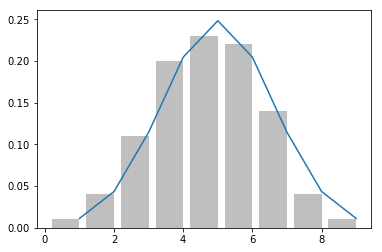

In [8]:
# Ploting both Binomial Histogram and Normal Approximation 

def make_hist(p, n, num_points):

    data = [binomial(p, n) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    x=[x - 0.4 for x in histogram.keys()]
    y=[v / num_points for v in histogram.values()] # This give probability 
    plt.bar(x,y,0.8,color='0.75')

    # Using central limit theorem of many random variables to approximate Binomial =Sum (Bernoulli) ~ N(.,.)
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    # Approximating the th probability in bins 
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs,ys)
    plt.show()
    
make_hist(0.5, 10, 100)

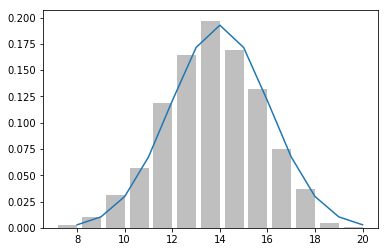

In [9]:
# Bernouli with p=0.7, run it 20 times for Binomial, and Generate that in 100 runs 
make_hist(0.7, 20, 1000)

In [10]:
# use if __name__==__main__: to create python module or import it 

# Baysian Theorem (Conditional Probability)
# Example on coditional probability: 
#     P(both girls | older)= P(older|both girls)*P(both girls )/P(Older)
#                          =  P(older|both girls)*P(both girls )/P(Older)
#                          = (1)*(1/4)/(1/2)=1/2
# Example on coditional probability: 
#     P(both girls | either)= P(either|both girls)*P(both girls )/P(either)
#                           = P(either|both girls)*P(both girls )/P(either)
#                           = (1)*(1/4)(3/4)=1/3   # (boy,girl),(girl,girl), (girl,girl),(boy,boy)

# Random Choice 
def random_kid():
    return random.choice(["boy", "girl"])


#
# CONDITIONAL PROBABILITY
#

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(both | older):", both_girls / older_girl)      # 0.514 ~ 1/2
print("P(both | either): ", both_girls / either_girl)   # 0.342 ~ 1/3


P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


### Normal approximation for Binomial(n,p) ~ N(m,sigma) 


In [11]:
import math, random

def normal_approximation_to_binomial(n, p):
    """finds mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

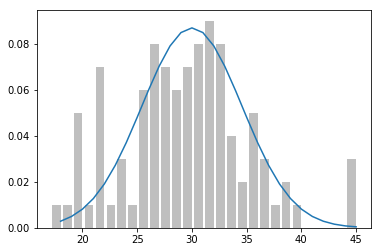

In [12]:
# 100 Benourli with 0.3 success ~ N(mu=30,sigma=4.5)
normal_approximation_to_binomial(100, 0.3)
make_hist(0.3, 100, 100)

In [13]:
#####
#
# probabilities a normal lies in an interval
#
######

def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

# the normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf

# it's above the threshold if it's not below the threshold
def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)

# it's between if it's less than hi, but not less than lo
def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

# it's outside if it's not between
def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)

######
#
#  normal bounds
#
######


In [14]:
x=-2
print ("P (x <{0}) = {1}".format(x, normal_probability_below(x)))
x=-1
print ("P (x <{0}) = {1}".format(x, normal_probability_below(x)))
x=1
print ("P (x <{0}) = {1}".format(x, normal_probability_below(x)))
x=2
print ("P (x <{0}) = {1}".format(x, normal_probability_below(x)))

P (x <-2) = 0.022750131948179264
P (x <-1) = 0.15865525393145702
P (x <1) = 0.841344746068543
P (x <2) = 0.9772498680518207


In [15]:
x=-2
print ("P (x >{0}) = {1}".format(x, normal_probability_above(x)))
x=-1
print ("P (x >{0}) = {1}".format(x, normal_probability_above(x)))
x=1
print ("P (x >{0}) = {1}".format(x, normal_probability_above(x)))
x=2
print ("P (x >{0}) = {1}".format(x, normal_probability_above(x)))

P (x >-2) = 0.9772498680518207
P (x >-1) = 0.841344746068543
P (x >1) = 0.15865525393145696
P (x >2) = 0.02275013194817932


In [16]:
x1=-2;x2=2
print ("P ({0} < x < {1}) = {2}".format(x1,x2, normal_probability_between(x1,x2)))
x1=-1;x2=1
print ("P ({0} < x < {1}) = {2}".format(x1,x2, normal_probability_between(x1,x2)))
x1=0;x2=2
print ("P ( {0} < x < {1}) = {2}".format(x1,x2, normal_probability_between(x1,x2)))
x1=0;x2=0.5
print ("P ({0} < x < {1}) = {2}".format(x1,x2, normal_probability_between(x1,x2)))

P (-2 < x < 2) = 0.9544997361036414
P (-1 < x < 1) = 0.6826894921370861
P ( 0 < x < 2) = 0.4772498680518207
P (0 < x < 0.5) = 0.19146246127401312


### For normal distribution, find the z value for given prbability
*  z for which P(Z <= z) = probability
*  z for which P(Z >= z) = probability
*  z for which P(z <= Z <= z) = probability


In [21]:

def normal_upper_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """returns the symmetric (about the mean) bounds
    that contain the specified probability"""
    tail_probability = (1 - probability) / 2

    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound


In [28]:
probability=0.9
print ("z = {0:0.2f} for which P(Z <= {0:0.2f}) = {1:0.2f}".format( normal_upper_bound(probability),probability))
probability=0.1
print ("z = {0:0.2f} for which P(Z <= {0:0.2f}) = {1:0.2f}".format( normal_upper_bound(probability),probability))
probability=0.5
print ("z = {0:0.2f} for which P(Z <= {0:0.2f}) = {1:0.2f}".format( normal_upper_bound(probability),probability))
probability=0.05
print ("z = {0:0.2f} for which P(Z <= {0:0.2f}) = {1:0.2f}".format( normal_upper_bound(probability),probability))

z = 1.28 for which P(Z <= 1.28) = 0.90
z = -1.28 for which P(Z <= -1.28) = 0.10
z = 0.00 for which P(Z <= 0.00) = 0.50
z = -1.64 for which P(Z <= -1.64) = 0.05


In [29]:
probability=0.9
print ("z = {0:0.2f} for which P(Z >= {0:0.2f}) = {1:0.2f}".format( normal_lower_bound(probability),probability))
probability=0.1
print ("z = {0:0.2f} for which P(Z >= {0:0.2f}) = {1:0.2f}".format( normal_lower_bound(probability),probability))
probability=0.5
print ("z = {0:0.2f} for which P(Z >= {0:0.2f}) = {1:0.2f}".format( normal_lower_bound(probability),probability))
probability=0.05
print ("z = {0:0.2f} for which P(Z >= {0:0.2f}) = {1:0.2f}".format( normal_lower_bound(probability),probability))

z = -1.28 for which P(Z >= -1.28) = 0.90
z = 1.28 for which P(Z >= 1.28) = 0.10
z = 0.00 for which P(Z >= 0.00) = 0.50
z = 1.64 for which P(Z >= 1.64) = 0.05


In [36]:
list(normal_two_sided_bounds(probability))[:]


[-1.6448497772216797, 1.6448497772216797]

In [43]:
probability=0.9
print ("z1 = {0:0.2f}, z2 = {1:0.2f} for which P({0:0.2f}<= Z <= {1:0.2f} ) = {2:0.2f}".\
       format(normal_two_sided_bounds(probability)[0],normal_two_sided_bounds(probability)[1],probability))

probability=0.1
print ("z1 = {0:0.2f}, z2 = {1:0.2f} for which P({0:0.2f}<= Z <= {1:0.2f} ) = {2:0.2f}".\
       format(normal_two_sided_bounds(probability)[0],normal_two_sided_bounds(probability)[1],probability))

probability=0.5
print ("z1 = {0:0.2f}, z2 = {1:0.2f} for which P({0:0.2f}<= Z <= {1:0.2f} ) = {2:0.2f}".\
       format(normal_two_sided_bounds(probability)[0],normal_two_sided_bounds(probability)[1],probability))

z1 = -1.64, z2 = 1.64 for which P(-1.64<= Z <= 1.64 ) = 0.90
z1 = -0.13, z2 = 0.13 for which P(-0.13<= Z <= 0.13 ) = 0.10
z1 = -0.67, z2 = 0.67 for which P(-0.67<= Z <= 0.67 ) = 0.50


### Calculating two Sided p-Value

In [55]:

def two_sided_p_value(x, mu=0, sigma=1):
    if x >= mu:
        # if x is greater than the mean, the tail is above x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # if x is less than the mean, the tail is below x
        return 2 * normal_probability_below(x, mu, sigma)

    
def plot_Norm_pdf(plt,mu=0, sigma=1):
    xs = [mu+x / 10.0 for x in range(-50, 50)]
    plt.figure(figsize=(8,8))
    plt.plot(xs,[normal_pdf(x,mu=mu, sigma=sigma) for x in xs],'-',label='mu={0},sigma={1}'.format(mu,sigma))
    plt.legend(loc=1)
    plt.grid()
    plt.show()



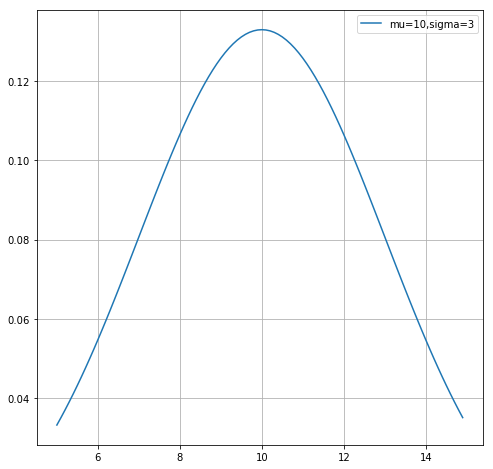

In [59]:
plot_Norm_pdf(plt,mu=10, sigma=3)

### Example: N(mu=10, sigma=3) what is the two sided p-value for 5,10,12

In [64]:
print('\n')
print("Two-sided-p-value = {0:0.2f}".format(two_sided_p_value(5, mu=3, sigma=5)))
print("Two-sided-p-value = {0:0.2f}".format(two_sided_p_value(10, mu=3, sigma=5)))
print("Two-sided-p-value = {0:0.2f}".format(two_sided_p_value(12, mu=3, sigma=5)))
print('\n')




Two-sided-p-value = 0.69
Two-sided-p-value = 0.16
Two-sided-p-value = 0.07




## Question : Running 1000 Bernouli, 
* what is the P-value to have extreme number of heades 500+30 and 500-30  

In [91]:
def count_extreme_values():
    extreme_value_count = 0
    for _ in range(10000):
        num_heads = sum(1 if random.random() < 0.5 else 0    # count # of heads
                        for _ in range(1000))                # in 1000 flips
        if num_heads >= 530 or num_heads <= 470:             # and count how often
            extreme_value_count += 1                         # the # is 'extreme'

    return extreme_value_count / 10000

upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

In [92]:
count_extreme_values()

0.061

# Approximate the Binomial(1000,0.5) to Normal and then find the two sided value 

In [93]:
x=30
mu,sigma=normal_approximation_to_binomial(1000, 0.5)
two_sided_p_value(x+mu, mu=mu, sigma=sigma)



0.05777957112359733

In [132]:
##
#
# P-hacking
#
##

def run_experiment():
    """flip a fair coin 1000 times, True = heads, False = tails"""
    return [random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment):
    """using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531


### How to prove that the coin is fair with 5% confidence 

In [133]:
sumV=0
for _ in range(10000):
    sumV=sumV+reject_fairness(run_experiment())
    
print ('Probability of Un-fairness ={}'.format(sumV/10000))

Probability of Un-fairness =0.0433


In [147]:
##
#
# running an A/B test
#
##

def estimated_parameters(N, n):
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

def a_b_test_statistic(N_A, n_A, N_B, n_B):
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    # As the STD of the two test become smaller, significance become bigger 
    # As the Difference in mean between the two value become bigger 
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)



In [166]:
## Running Two tests and Identify the Significance?

def a_b_test_statistic(p_A, p_B, sigma_A, sigma_B):
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)


mu_0, sigma_0 = normal_approximation_to_binomial(10000, 0.5)
mu_1, sigma_1 = normal_approximation_to_binomial(10000, 0.501)

a_b_test_statistic(mu_0,mu_1, sigma_0, sigma_1)

0.14142149765887788


# Alpha Beta Destribution 

In [167]:
def B(alpha, beta):
    """a normalizing constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x, alpha, beta):
    if x < 0 or x > 1:          # no weight outside of [0, 1]
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)


In [198]:
def plot_Beta_Alpha(alpha,beta):
    xs = [x / 100.0 for x in range(0, 100)]
    plt.figure(figsize=(8,8))
    plt.plot(xs,[beta_pdf(x, alpha, beta) for x in xs],'-',label='alpha={0},beta={1}'.format(alpha,beta))
    plt.legend(loc=1)
    plt.grid()
    plt.show()


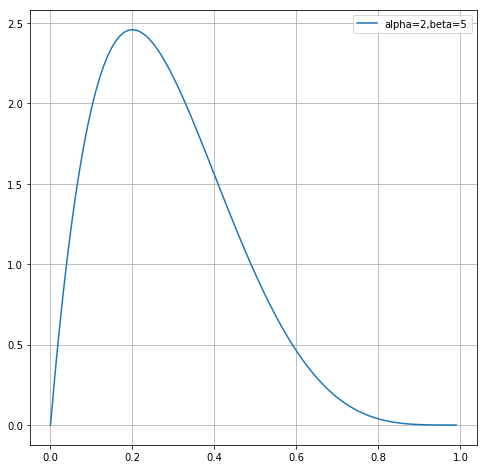

In [199]:
plot_Beta_Alpha(alpha=2,beta=5)

In [ ]:
##
#
# Bayesian Inference
#
##

In [221]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
print()
print("mu_0 = ", mu_0)
print("sigma_0 = ", sigma_0)
# Finding the vbounds that gurantee 95 % of the vlaues
print("normal_two_sided_bounds(0.95, mu_0, sigma_0) = ", normal_two_sided_bounds(0.95, mu_0, sigma_0))
print()


mu_0 =  500.0
sigma_0 =  15.811388300841896
normal_two_sided_bounds(0.95, mu_0, sigma_0) =  (469.01026640487555, 530.9897335951244)



In [222]:

print("power of a test \n=================")

print("95% bounds based on assumption p is 0.5")

lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
print("lo = ", lo)
print("hi = ", hi)

print("=========================")


power of a test 
95% bounds based on assumption p is 0.5
lo =  469.01026640487555
hi =  530.9897335951244


In [223]:
print("actual mu and sigma based on p = 0.55 \n=======================================")
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
print("mu_1 = ", mu_1)
print("sigma_1 = ", sigma_1)
print("=======================================")

actual mu and sigma based on p = 0.55 
mu_1 =  550.0
sigma_1 =  15.732132722552274


In [224]:
print("95% bounds based on assumption p is 0.55")

lo, hi = normal_two_sided_bounds(0.95, mu_1, sigma_1)
print("lo = ", lo)
print("hi = ", hi)

print("=========================")

95% bounds based on assumption p is 0.55
lo =  519.1656043935702
hi =  580.8343956064298


In [225]:
# a type 2 error means we fail to reject the null hypothesis
# which will happen when X is still in our original interval
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability # 0.887

print("type 2 probability = ", type_2_probability)
print("power = ", power)
print()

type 2 probability =  0.9499998667811616
power =  0.05000013321883845



In [226]:
print("one-sided test")
hi = normal_upper_bound(0.95, mu_0, sigma_0)
print("hi", hi) # is 526 (< 531, since we need more probability in the upper tail)
type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - type_2_probability # = 0.936
print("type 2 probability", type_2_probability)
print("power", power)
print()

one-sided test
hi 526.0073585242053
type 2 probability 0.06362051966928273
power 0.9363794803307173



In [227]:
print("two_sided_p_value(529.5, mu_0, sigma_0)", two_sided_p_value(529.5, mu_0, sigma_0))

print("two_sided_p_value(531.5, mu_0, sigma_0)", two_sided_p_value(531.5, mu_0, sigma_0))

print("upper_p_value(525, mu_0, sigma_0)", upper_p_value(525, mu_0, sigma_0))
print("upper_p_value(527, mu_0, sigma_0)", upper_p_value(527, mu_0, sigma_0))
print()

two_sided_p_value(529.5, mu_0, sigma_0) 0.06207721579598857
two_sided_p_value(531.5, mu_0, sigma_0) 0.046345287837786575
upper_p_value(525, mu_0, sigma_0) 0.056923149003329065
upper_p_value(527, mu_0, sigma_0) 0.04385251499101195



In [234]:
print("P-hacking\n==========================")

random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment
                      for experiment in experiments
                      if reject_fairness(experiment)])

print(num_rejections, "rejections out of 1000")
print("==========================")

P-hacking
46 rejections out of 1000


In [245]:
def a_b_test_statistic(N_A, n_A, N_B, n_B):
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    # As the STD of the two test become smaller, significance become bigger 
    # As the Difference in mean between the two value become bigger 
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

print("A/B testing \n======================================")
z = a_b_test_statistic(1000, 200, 1000, 180)
print("Z = a_b_test_statistic(1000, 200, 1000, 180) ==>", z)
print("p-value", two_sided_p_value(z))
z = a_b_test_statistic(1000, 200, 1000, 150)
print("Z =a_b_test_statistic(1000, 200, 1000, 150) ==> ", z)
print("p-value", two_sided_p_value(z))
print ("======================================")



A/B testing 
Z = a_b_test_statistic(1000, 200, 1000, 180) ==> -1.1403464899034472
p-value 0.254141976542236
Z =a_b_test_statistic(1000, 200, 1000, 150) ==>  -2.948839123097944
p-value 0.003189699706216853
